<a id="head"></a>
# Ground State Energy Prediction - Machine Learning - Regression

***

The dataset is from [Kaggle](https://www.kaggle.com/burakhmmtgl/energy-molecule "Kaggle"), collected by [BurakH](https://www.kaggle.com/burakhmmtgl "BurakH"). The dataset contains **ground state energies** of 16,242 molecules calculated by **quantum mechanical simulations**. In each molecule, there are **1275** columns which are entries in the Coulomb matrix of that molecule (features), as well as its ground state energy (label).

Ground state energy is important in **quantum physics**, while the computational cost of simulating these energies is very high. Thus the intuition is to predict this value by the help of machine learning.

Our goal of this project is to **train machine learning models** and **predict** the ground state energies of the given molecules.


This is a **tiny project**, without many data cleaning and visualization processes. The focus of this project is to model and see **how overfitting can affect dramatically the performance of the models**.

## Table of Contents
1. [Import necessary libraries](#1)<br><br>
2. [First glance](#2)<br><br>
3. [Model preparation](#3)
  - [Normalization](#3.1)
  - [Split training and testing set](#3.2)<br><br>
4. [Models and tuning](#4)
  - [Linear regression](#4.1)
  - [Lasso regression](#4.2)
  - [K - Nearest Neighbor](#4.3)
  - [Multi-layer Perceptron](#4.4)
  - [Support Vector Machine](#4.5)<br><br>
5. [Conclusion](#5)

<a id="1"></a>
## 1. Import necessary libraries
[Back to top](#head)

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout, Activation

%matplotlib inline
pd.set_option('display.max_rows',40)


Bad key "text.kerning_factor" on line 4 in
C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<a id="2"></a>
## 2. First glance
[Back to top](#head)

In [2]:
df = pd.read_csv('GroundStateEnergy.csv')

In [3]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8139.041805,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,4698.182820,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,0.000000,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,4068.250000,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,8142.500000,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,12207.750000,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,16272.000000,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


**Remove useless columns:**

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('pubchem_id', axis=1)

As all feature columns are **matrix entrances**, there is not much information to dig. But we can still have a look at the **correlations among features and label**.

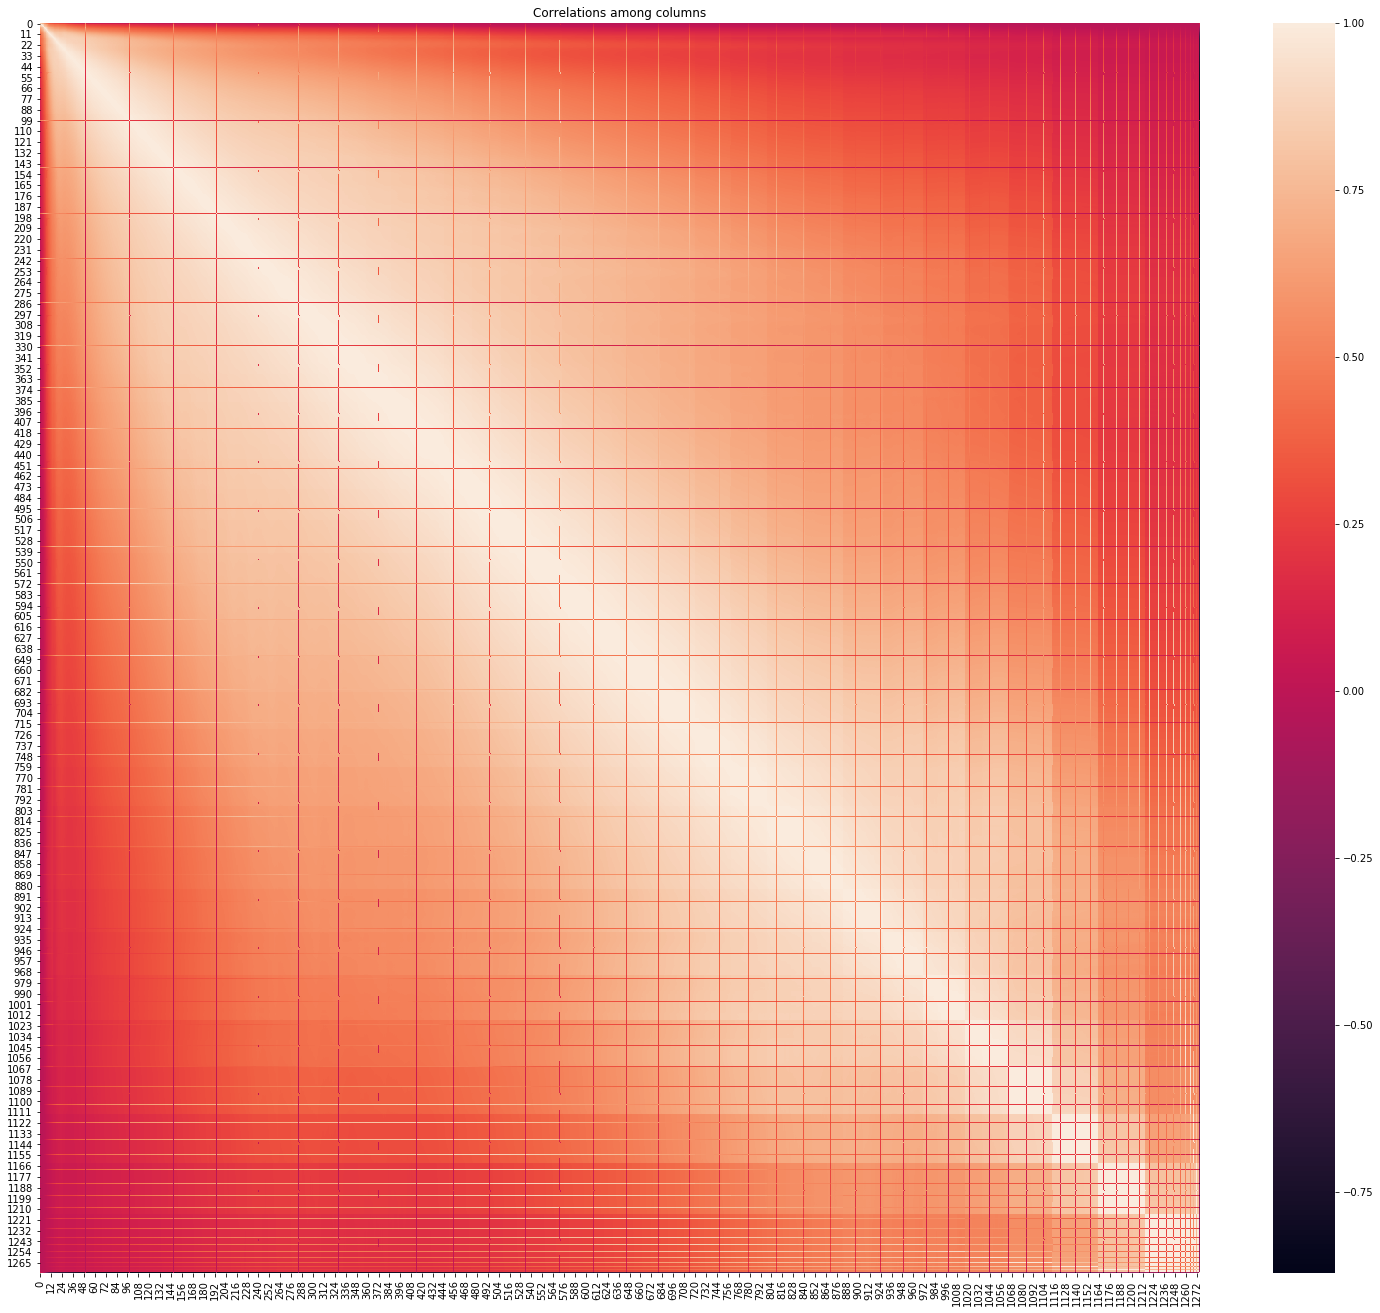

In [6]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(26,23))
ax.set_title('Correlations among columns')
sns.heatmap(cor)

We see that columns that close to each other tend to have **higher correlations**. This indicates that we may encounter **overfitting** problems when trying some sensitive models (such as **linear regression**). 

In [7]:
cor.iloc[1275].sort_values

<bound method Series.sort_values of 0       0.100467
1       0.104562
2       0.064153
3       0.025034
4      -0.022470
          ...   
1271   -0.140361
1272   -0.183995
1273   -0.140366
1274   -0.140660
Eat     1.000000
Name: Eat, Length: 1276, dtype: float64>

There are **not very high correlations between the ground state energy (our label) and the columns (features)**.

<a id="3"></a>
## 3. Model preparation
[Back to top](#head)

<a id="3.1"></a>
### 3.1 Normalization 

We need to **normalize** all the features so that can all be **re-scaled to the same normal distribution**. It makes the **convergence faster and easier** in the training processes of some machine learning models (such as linear regression, SVM, K-NearestNeighbor).

In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()


for i in range(0,1275):
    i=str(i)
    df[i] = std_scaler.fit_transform(df[i].values.reshape(-1,1))

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,-0.372795,-0.534448,-1.043596,-0.936145,-0.855299,-0.806195,-0.695008,-0.583679,-0.468653,-0.349884,...,-0.049014,-0.049015,-0.049013,11.309499,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-19.013763
1,-0.372795,-0.207476,-0.253760,-0.098378,0.130369,0.491641,0.699988,0.930156,0.567022,0.561288,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-10.161019
2,-0.372795,-0.532992,-1.038028,-0.944372,-0.866204,-0.819541,-0.722963,-0.637582,-1.053761,-1.517533,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-9.376619
3,-0.372795,-0.527745,-0.339355,-0.102870,0.123643,0.486547,-0.662823,-0.546362,-0.429896,-0.324998,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-13.776438
4,-0.372795,-0.526820,-0.339746,-0.102590,0.117769,-0.791526,-0.680220,-0.577064,-1.001983,-0.913487,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-8.537140


Now all features have been re-scaled.

<a id="3.2"></a>
### 3.2 Split training and testing set

In [10]:
y = df['Eat']
X = df.drop('Eat', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

<a id="4"></a>
## 4. Models and tuning
[Back to top](#head)

In [11]:
model_score = pd.DataFrame(columns=('r2', 'rmse'))

<a id="4.1"></a>
### 4.1 Linear regression

We first try the simplest linear model.

In [12]:
linearR = LinearRegression(n_jobs = -1)
linearR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

For the linear regressor, the root mean square error for the testing set is: 355583368.81051964
The r2 score for the testing set is: -9374282954772172.0


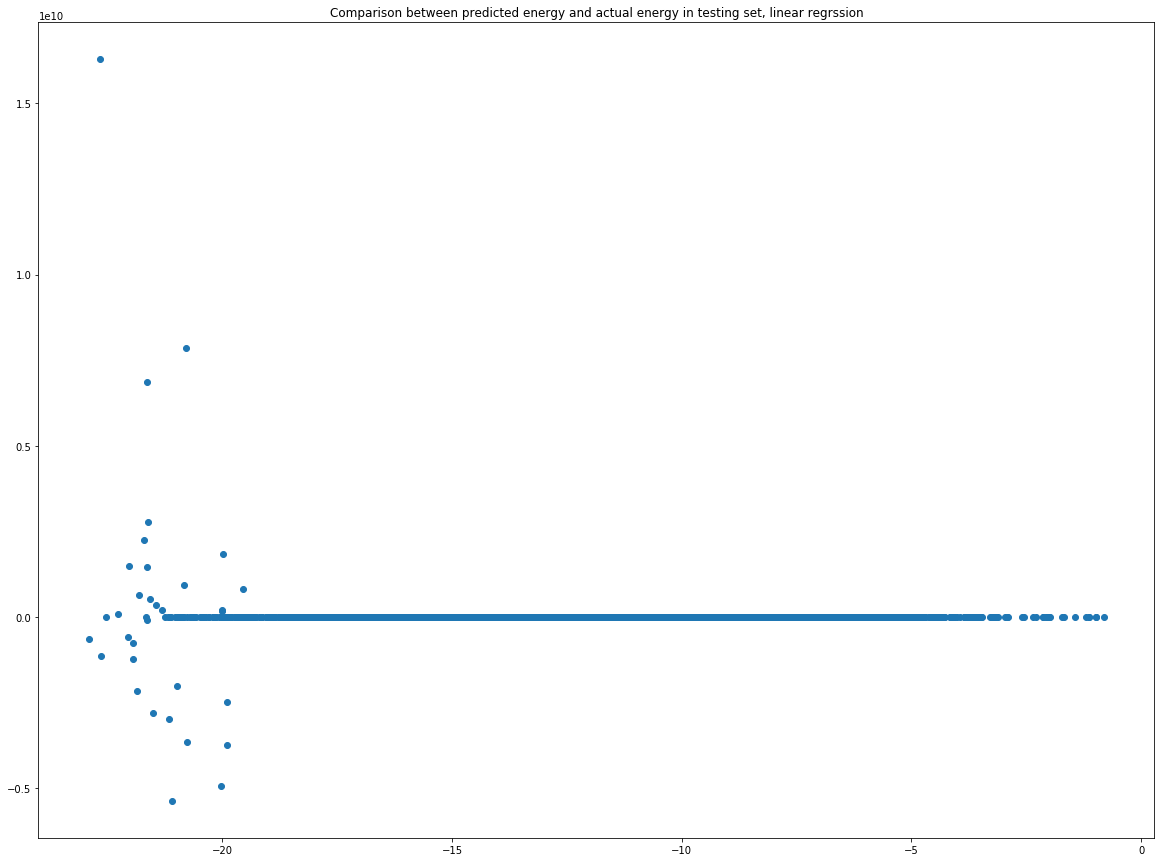

In [13]:
predict = linearR.predict(X_test)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, predict))
lr_r2 = metrics.r2_score(y_test, predict)

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse]}, index = ['Linear Regression']))

print('For the linear regressor, the root mean square error for the testing set is:', lr_rmse)
print('The r2 score for the testing set is:', lr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in testing set, linear regrssion')
plt.scatter(y_test, predict)

We see that linear regression porforms **poorly** in the testing set. The result even makes me doubt whether there is anything going wrong with the code. To see if the model encounters an **overfitting problem**, an easy way is to **compare this result with the result from the training set**:

For the linear regressor, the root mean square error for the training set is: 0.6175295238918586
The r2 score for the testing set is: 0.971444947370058


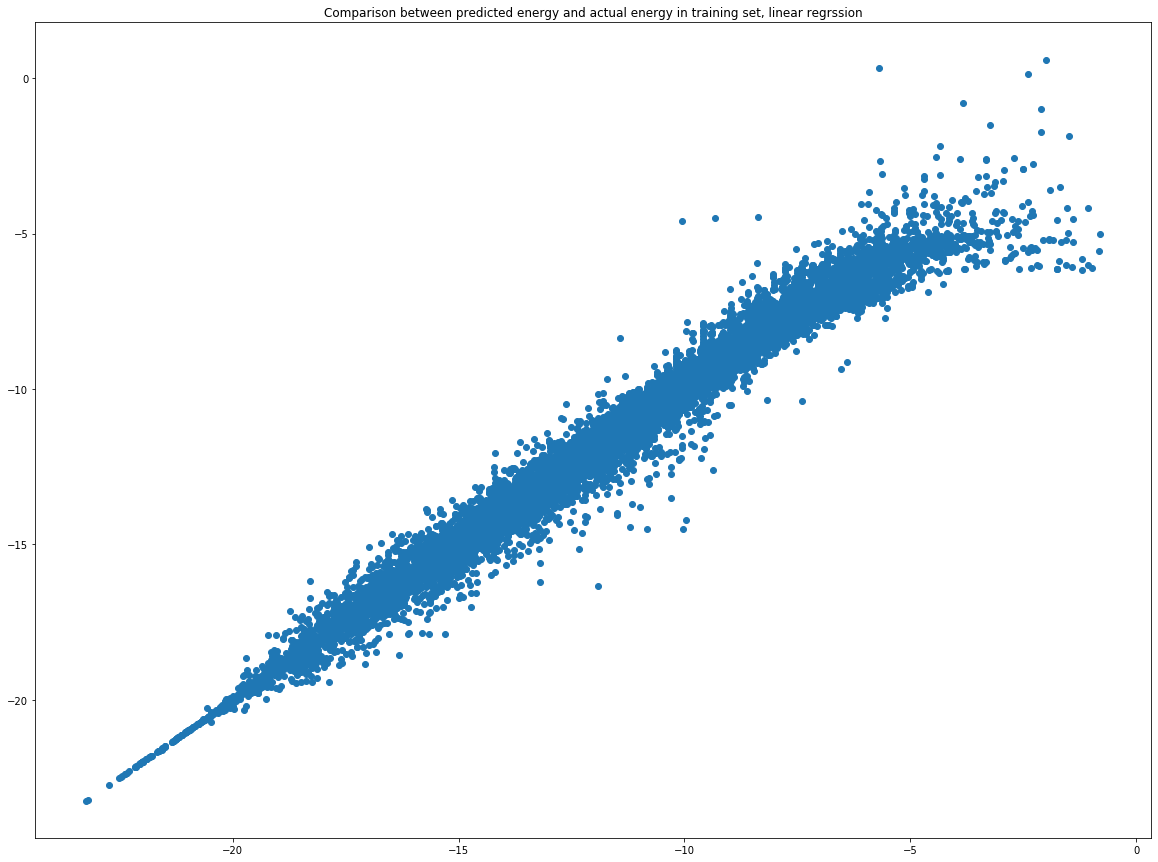

In [14]:
predicted_y_train = linearR.predict(X_train)
lr_train_rmse = math.sqrt(metrics.mean_squared_error(y_train, predicted_y_train))
lr_train_r2 = metrics.r2_score(y_train, predicted_y_train)

print('For the linear regressor, the root mean square error for the training set is:', lr_train_rmse)
print('The r2 score for the testing set is:', lr_train_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in training set, linear regrssion')
plt.scatter(y_train, predicted_y_train)

Oops! The result looks **much better than the testing dataset**. Apparently there is **significant overfitting** in this model. 

Now consider adding **regularization** methods to supress the curves and avoid overfitting.

To let the model **"select"** proper features from these thousands of features, we can try adding **L1 regularization** to the linear regression, aka **Lasso Regression**.

<a id="4.2"></a>
### 4.2 Lasso regression

In [15]:
alphas = np.logspace(-4,4,12)
lasso = LassoCV(max_iter=10**6, alphas=alphas, n_jobs=-1)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 5.33669923e-04, 2.84803587e-03, 1.51991108e-02,
       8.11130831e-02, 4.32876128e-01, 2.31012970e+00, 1.23284674e+01,
       6.57933225e+01, 3.51119173e+02, 1.87381742e+03, 1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000000,
        n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

For the lasso regressor, the root mean square error for the testing set is: 0.8239907226588724
The r2 score for the testing set is: 0.9496615519617888


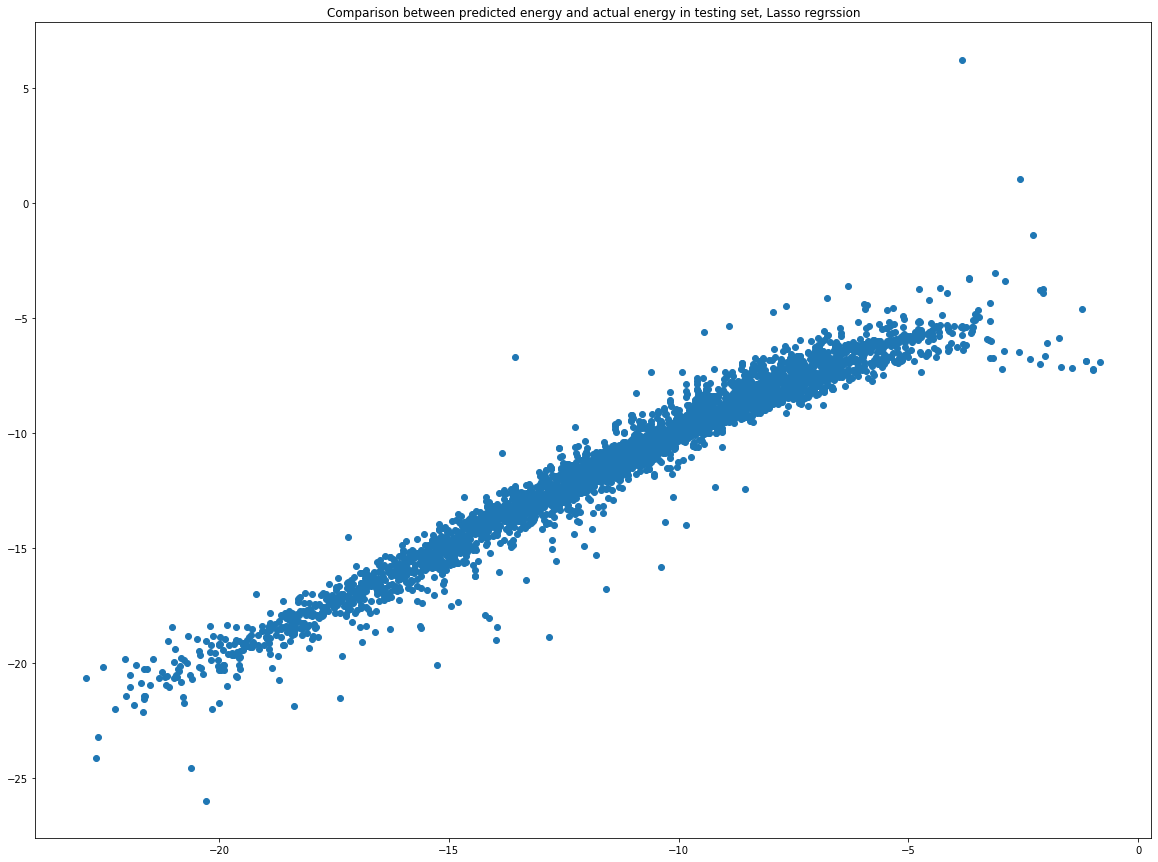

In [16]:
lasso_predict = lasso.predict(X_test)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))
lasso_r2 = metrics.r2_score(y_test, lasso_predict)

model_score = model_score.append(pd.DataFrame({'r2':[lasso_r2], 'rmse':[lasso_rmse]}, index = ['Lasso Regression']))
                                 
print('For the lasso regressor, the root mean square error for the testing set is:', lasso_rmse)
print('The r2 score for the testing set is:', lasso_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in testing set, Lasso regrssion')
plt.scatter(y_test, lasso_predict)

With r2 score = 0.95, this time the model **improve a lot compared to linear regression**.

For the Lasso regressor, the root mean square error for the training set is: 0.7852673105279074
The r2 score for the testing set is: 0.9538254628538392


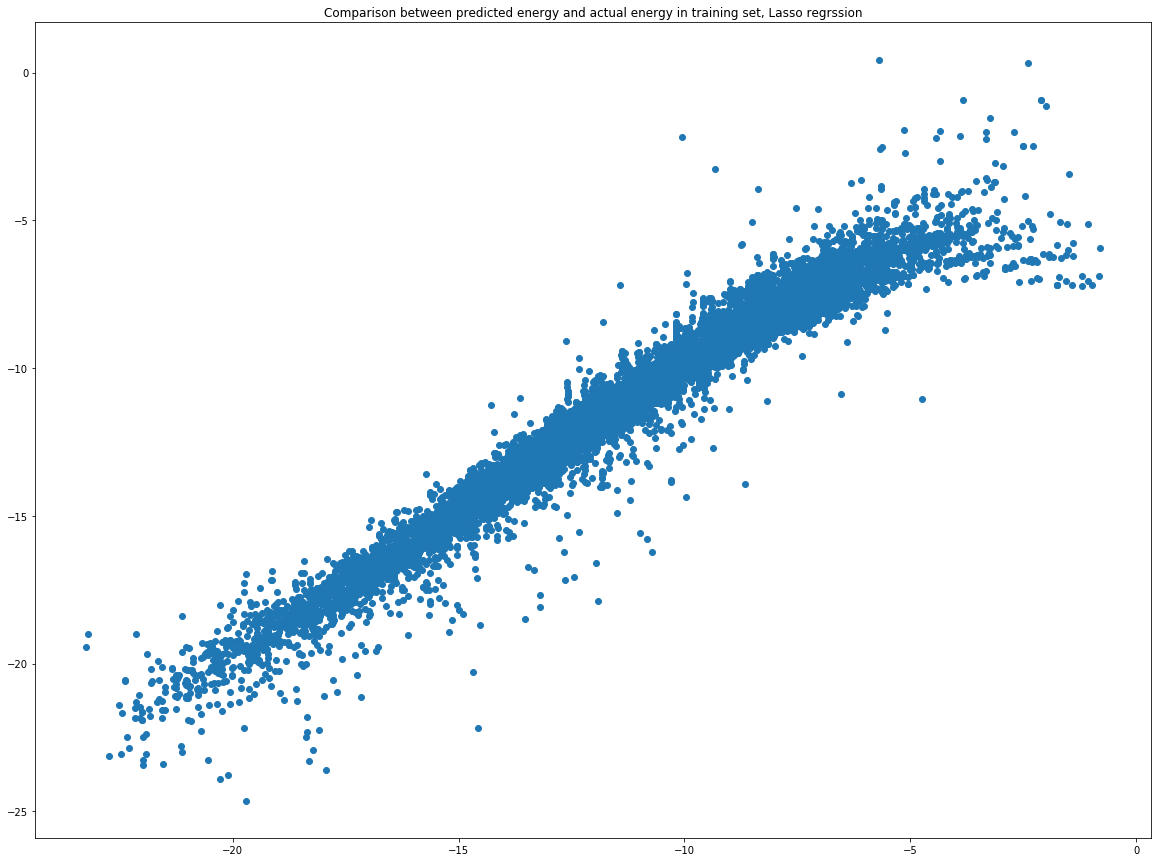

In [17]:
predicted_lasso_train = lasso.predict(X_train)
lasso_train_rmse = math.sqrt(metrics.mean_squared_error(y_train, predicted_lasso_train))
lasso_train_r2 = metrics.r2_score(y_train, predicted_lasso_train)

print('For the Lasso regressor, the root mean square error for the training set is:', lasso_train_rmse)
print('The r2 score for the testing set is:', lasso_train_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in training set, Lasso regrssion')
plt.scatter(y_train, predicted_lasso_train)

There is **no big different between performances in the training set and testing set**, indicating **no overfitting** problem.

<a id="4.3"></a>
### 4.3 K - Nearest Neighbor

Now try KNN. Although KNN is relatively slow, especially for prediction as it is a "**lazy learning**" model, usually achieves **pretty high accuracy**. We now train some KNN models with **differnt number of neighbors** and select the best one using cross validation.

In [18]:
knnReg = KNeighborsRegressor()

param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,7)]
     }]

grid_search_knn = GridSearchCV(knnReg, param_grid,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [19]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

The best **number of neighbors** is 3.

For the K-NN regressor, the root mean square error for the testing set is: 0.21970142855349462
The r2 score for the testing set is: 0.9964213358758871


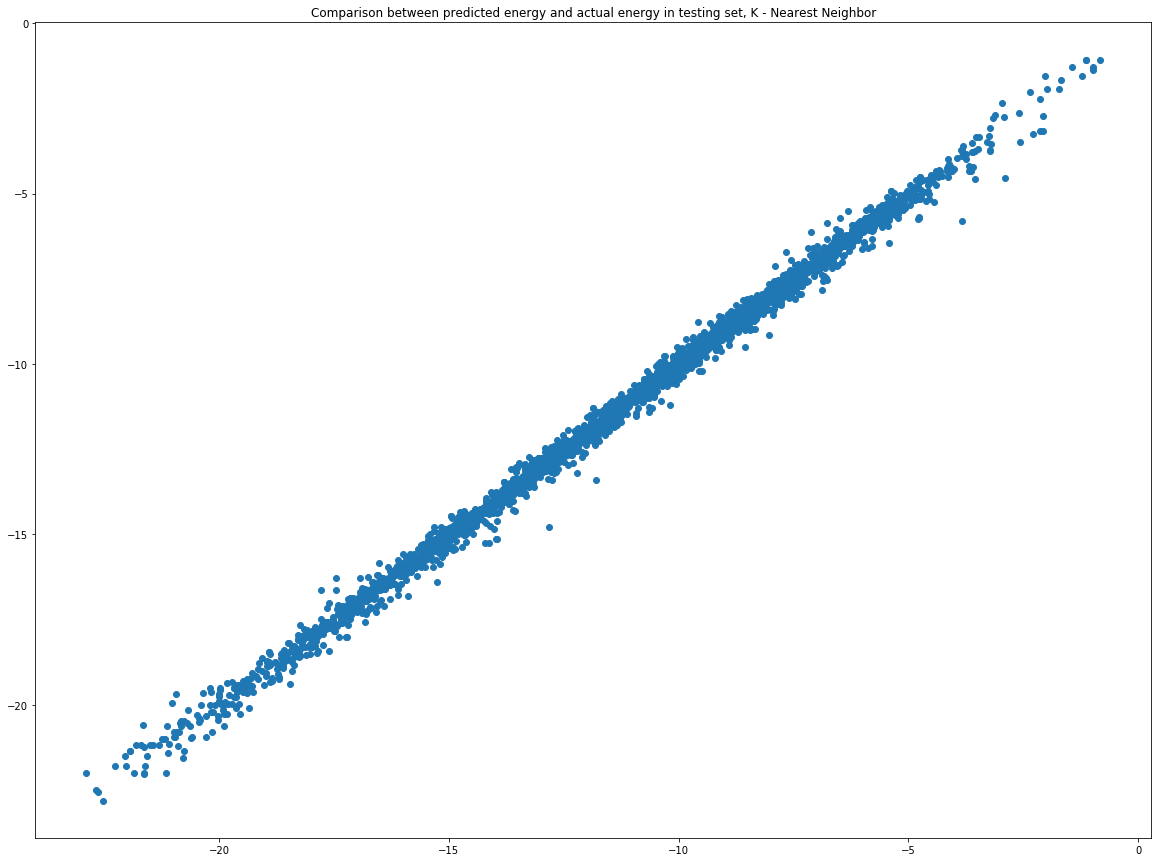

In [20]:
knn_predict = knn_best.predict(X_test)

knn_r2 = metrics.r2_score(y_test, knn_predict)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_predict))

model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['K - Nearest Neighbor']))

print('For the K-NN regressor, the root mean square error for the testing set is:', knn_rmse)
print('The r2 score for the testing set is:', knn_r2)
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in testing set, K - Nearest Neighbor')
plt.scatter(y_test, knn_predict)

We are surprise to see that KNN does achieve high accuracy, with **r2 score = 0.9964 and rmse = 0.22.**

<a id="4.4"></a>
### 4.4 Multi-layer Perceptron

We now try to train a **fully connected neuron network**.

In [21]:
nn_model = Sequential()
nn_model.add(Dense(input_dim = 1275, units = 300, activation = 'relu'))
nn_model.add(Dense(units=300, activation='relu'))
nn_model.add(Dense(units=1))
nn_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mse'])

In [22]:
history = nn_model.fit(X_train, y_train, batch_size=100, epochs=150, verbose=0)

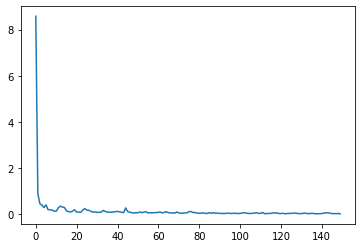

In [23]:
plt.plot(history.history['loss'])

For the MLP regressor, the root mean square error for the testing set is: 0.20126319377529314
The r2 score for the testing set is: 0.996996802470201


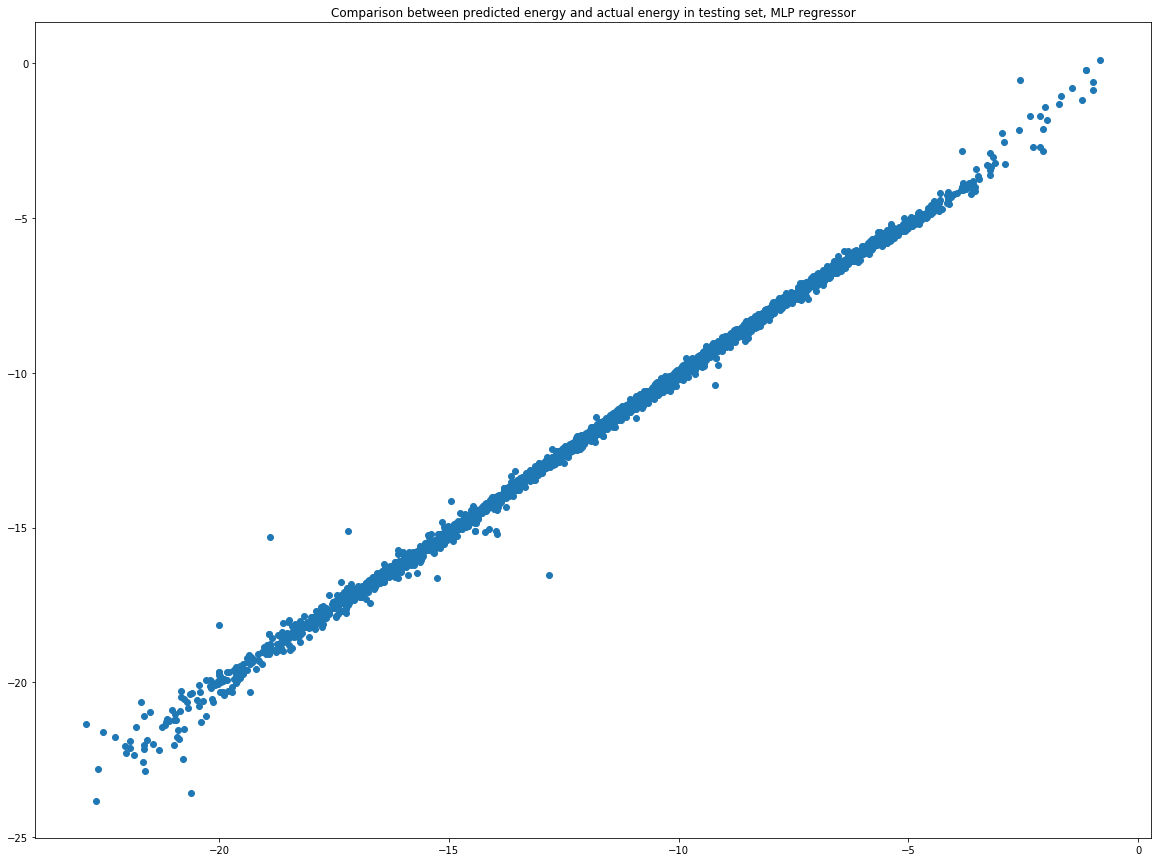

In [24]:
nn_predict = nn_model.predict(X_test)
nn_rmse = math.sqrt(metrics.mean_squared_error(y_test, nn_predict))
nn_r2 = metrics.r2_score(y_test, nn_predict)

model_score = model_score.append(pd.DataFrame({'r2':[nn_r2], 'rmse':[nn_rmse]}, index = ['MLP']))

print('For the MLP regressor, the root mean square error for the testing set is:', nn_rmse)
print('The r2 score for the testing set is:', nn_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in testing set, MLP regressor')
plt.scatter(y_test, nn_predict)

With **r2 = 0.9970**, a little higher than the KNN model, our neuron network model refresh the highest accuracy.

<a id="4.5"></a>
### 4.5 Support Vector Machine

We now try the **support vector machine** with different choices of **kernel types (linear and Gaussian) and regularization factors "C"**.

In [25]:
SVMreg = SVR()

param_grid = [
     {
         'kernel':['rbf', 'linear'],
         'C':[0.1, 1, 10],
         'max_iter':[15000]
     }]

grid_search_svm = GridSearchCV(SVMreg, param_grid,n_jobs=-1,verbose=2)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.5min finished
C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'],
                          'max_iter': [15000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
svm_best = grid_search_svm.best_estimator_
svm_best

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=15000, shrinking=True, tol=0.001, verbose=False)

For the support vector regressor, the root mean square error for the testing set is: 0.29413045754369044
The r2 score for the testing set is: 0.9935859081469329


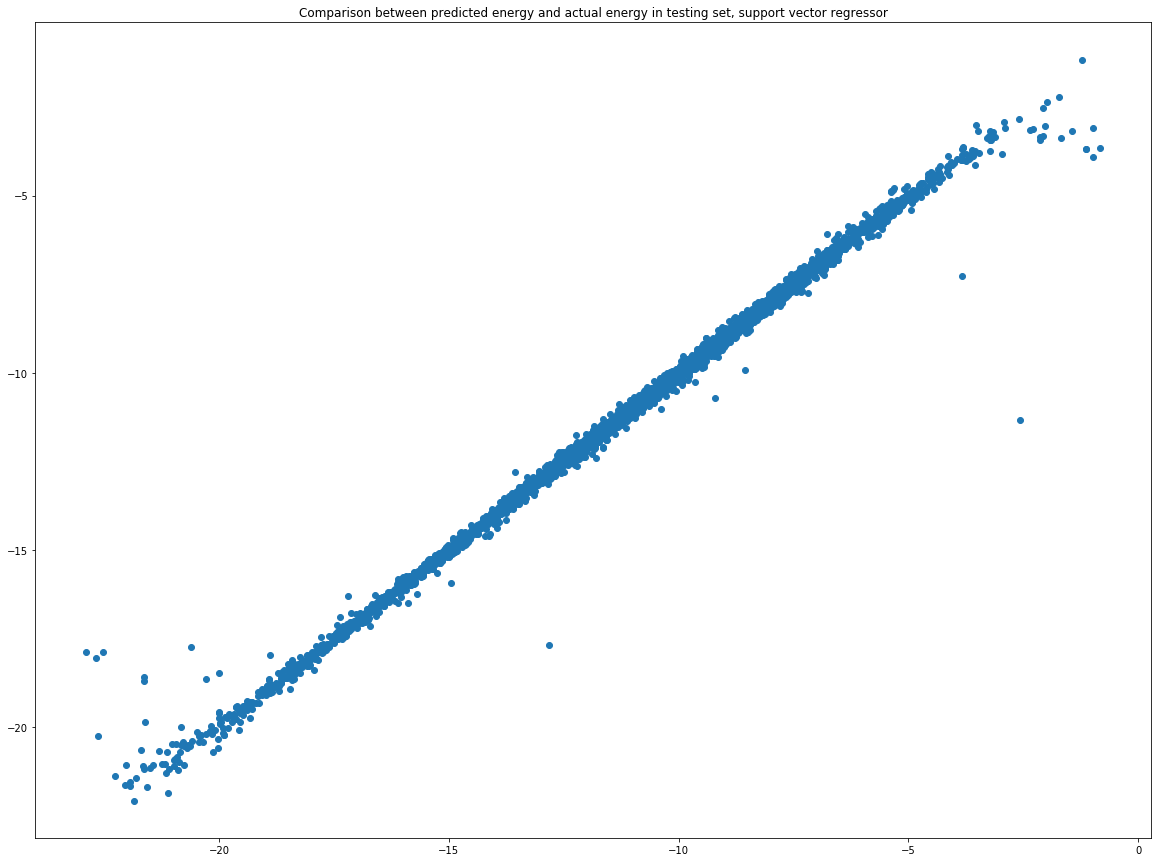

In [27]:
svm_predict = svm_best.predict(X_test)

svm_r2 = metrics.r2_score(y_test, svm_predict)
svm_rmse = math.sqrt(metrics.mean_squared_error(y_test, svm_predict))

model_score = model_score.append(pd.DataFrame({'r2':[svm_r2], 'rmse':[svm_rmse]}, index = ['SVM']))

print('For the support vector regressor, the root mean square error for the testing set is:', svm_rmse)
print('The r2 score for the testing set is:', svm_r2)
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted energy and actual energy in testing set, support vector regressor')
plt.scatter(y_test, svm_predict)

Support Vector Machine also achieve a relatively high accuracy.

<a id="5"></a>
## 5. Conclusion
[Back to top](#head)

In [28]:
model_score.sort_values(by=['r2'], ascending=False)

,r2,rmse
MLP,9.969968e-01,2.012632e-01
K - Nearest Neighbor,9.964213e-01,2.197014e-01
SVM,9.935859e-01,2.941305e-01
Lasso Regression,9.496616e-01,8.239907e-01
Linear Regression,-9.374283e+15,3.555834e+08


From the data frame above, we see that our **neuron network model has the best performance**. The error of the ground state energy prediction has been **low enough** for **quantum physics research**. I am really surprised that the machine learning models are able to find the hidden patterns from the features that lead to the correct (or approximate) answers.

I did not play with the parameters in the models very much, so the models still have **potentials to achieve even higher accuracy**. One thing to notice is that for all models, **predictions tend to have larger errors when the energy is very low and very high** (which is obvious from the scatter plots). Maybe next we can try to figure out the reason.